In [ ]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [3]:
# .explode([insert field]) turns every entry in a list, into an individual row
# store in variable for reuse
df_exploded = df.explode('job_skills')

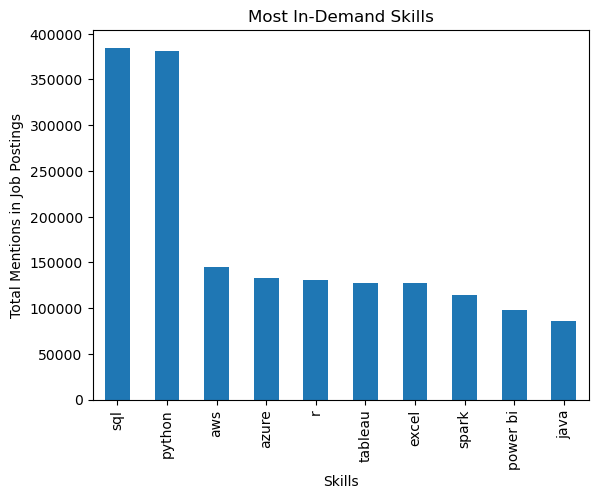

In [4]:
# visualises top 10 most popular skills in job postings
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

plt.xlabel('Skills')
plt.ylabel('Total Mentions in Job Postings')
plt.title('Most In-Demand Skills')
plt.show()

In [ ]:
# stores exploded df into variable
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [8]:
# variable is then converted into dataframe
df_skills_count = skills_count.reset_index(name = 'skill_count')

In [10]:
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [15]:
# sort df in descending order
df_skills_count = df_skills_count.sort_values('skill_count', ascending = False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [39]:
# analyses most in-demand skills for data analysts
job_title = 'Data Engineer'
top_skills = 10

df_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_final

,job_title_short,job_skills,skill_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


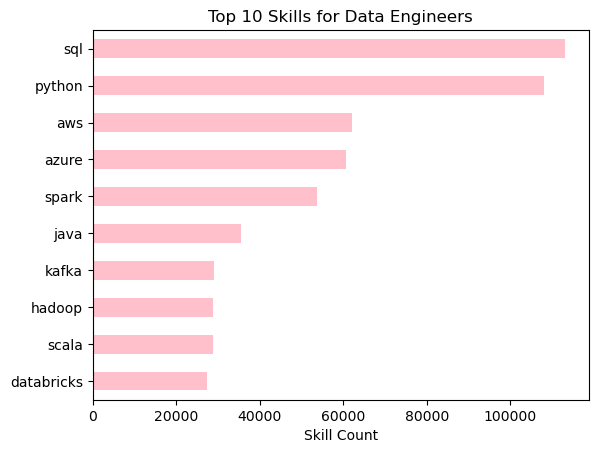

In [46]:
df_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', color = 'pink')

plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Skill Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.gca().invert_yaxis() # reorders axis from asc to desc, vice versa. invert_xaxis() also available
plt.show()